In [1]:
import pandas as pd

Problem Statement: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
Dataset: https://github.com/abulbasar/data/tree/master/kaggle-houseprice

In [2]:
df = pd.read_csv("/data/kaggle/data_combined_cleaned.csv")
df = df.drop(columns=["Id"])
df = df[~df.SalesPrice.isnull()]
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

# Exercise:
- Build a model to predict the SalesPrice using other columns as features. Split the dataset (1460 records) into training and test sets with 70/30 ratio. Take log of SalesPrice for prediction to reduce the impact of the outliers.
- What is the R2 score and rmse score? 
- Fit Lasso model. Test a few alpha values (>0) and see which gives a good r2 score. 

In [4]:
import numpy as np
from sklearn import preprocessing, model_selection, linear_model, metrics, pipeline

In [5]:
target = "SalesPrice"
X = df.drop(columns=[target])
X = pd.get_dummies(X, drop_first=True)
columns = X.columns
X = X.values.astype("float")
y = np.log(df[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                           test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])


pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("training r2", metrics.r2_score(y_train, y_train_pred))
print("test r2", metrics.r2_score(y_test, y_test_pred))

print("training rmse:"
    , np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("test rmse:"
      , np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
est = pipe.steps[-1][-1]
pd.DataFrame({"feature": columns, "coefficient": est.coef_})

training r2 0.9494518297088844
test r2 -3.0715943247509893e+22
training rmse: 0.08606817747710854
test rmse: 76190488351.17424


,feature,coefficient
0,MSSubClass,1.248159e-02
1,LotFrontage,1.963124e-03
2,LotArea,3.151273e-02
3,OverallQual,5.675519e-02
4,OverallCond,3.468973e-02
5,YearBuilt,5.024337e-02
6,YearRemodAdd,1.540301e-02
7,MasVnrArea,-3.995381e-03
8,BsmtFinSF1,4.530257e+10
9,BsmtFinSF2,1.612199e+10


In [6]:
target = "SalesPrice"
X = df.drop(columns=[target])
X = pd.get_dummies(X, drop_first=True)
columns = X.columns
X = X.values.astype("float")
y = np.log(df[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                           test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("training r2", metrics.r2_score(y_train, y_train_pred))
print("test r2", metrics.r2_score(y_test, y_test_pred))

print("training rmse:"
    , np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("test rmse:"
      , np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
est = pipe.steps[-1][-1]


summary = pd.DataFrame({"feature": columns, "coefficient": est.coef_})
summary["coef_mag"] = np.abs(summary.coefficient)
summary = summary.sort_values("coef_mag", ascending = False)
summary = summary[summary.coef_mag>0]
summary

training r2 0.9494518297088844
test r2 -3.0715943247509893e+22
training rmse: 0.08606817747710854
test rmse: 76190488351.17424


,feature,coefficient,coef_mag
15,GrLivArea,1.501695e+11,1.501695e+11
13,2ndFlrSF,-1.233520e+11,1.233520e+11
12,1stFlrSF,-1.112376e+11,1.112376e+11
219,GarageFinish_None,-1.072428e+11,1.072428e+11
134,Exterior2nd_CBlock,8.844505e+10,8.844505e+10
120,Exterior1st_CBlock,-8.844505e+10,8.844505e+10
224,GarageQual_None,7.930425e+10,7.930425e+10
229,GarageCond_None,7.930320e+10,7.930320e+10
166,BsmtCond_None,6.149525e+10,6.149525e+10
218,GarageType_None,-5.136464e+10,5.136464e+10


In [8]:
X.shape

(1460, 258)

In [10]:
import seaborn as sns

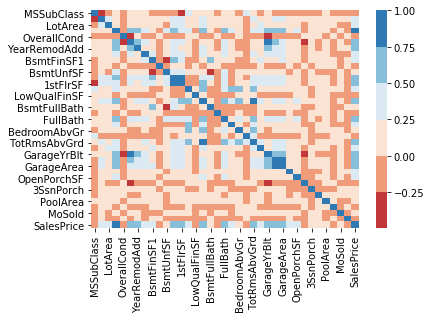

In [12]:
sns.heatmap(df.corr(), cmap=sns.color_palette("RdBu"))

In [15]:
from sklearn import decomposition

In [16]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [19]:
pca = decomposition.PCA()
X_train_pca = pca.fit_transform(X_train_std)

In [21]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,...,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,56.585127,70.494129,10657.748532,6.127202,5.625245,1971.475538,1985.448141,100.098826,451.033268,45.747554,...,0.003914,0.002935,0.081213,0.001957,0.868885,0.001957,0.007828,0.014677,0.825832,0.083170
std,41.891283,23.240123,10441.234005,1.356041,1.126421,30.062731,20.536267,173.032624,463.354106,164.895541,...,0.062469,0.054126,0.273296,0.044216,0.337692,0.044216,0.088171,0.120316,0.379440,0.276275
min,20.000000,21.000000,1300.000000,1.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7558.500000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,70.000000,9528.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,397.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,80.000000,11643.500000,7.000000,6.000000,2001.000000,2004.000000,165.750000,715.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

([], <a list of 0 Text xticklabel objects>)

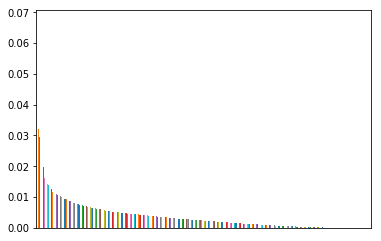

In [28]:
pd.Series(pca.explained_variance_ratio_).plot.bar()
plt.xticks([])

In [29]:
pd.DataFrame(X_train_pca).describe()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
count,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,...,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03
mean,7.126285e-17,-2.344423e-16,1.249272e-18,-3.497963e-17,-6.774859e-16,2.046634e-16,3.534898e-16,-2.972182e-16,2.867895e-16,2.637594e-16,...,-6.490821e-17,4.287013e-17,-3.185996e-17,2.210723e-17,1.399338e-17,-1.474845e-17,6.094050e-18,2.034362e-17,4.604496e-17,-1.117470e-17
std,4.119656e+00,2.850169e+00,2.724150e+00,2.559075e+00,2.373615e+00,2.235099e+00,2.025671e+00,2.003397e+00,1.887451e+00,1.875141e+00,...,2.491633e-16,2.538896e-16,2.555064e-16,2.565353e-16,2.571061e-16,2.570639e-16,2.574148e-16,2.566813e-16,2.445596e-16,5.839425e-17
min,-1.236753e+01,-9.440973e+00,-3.432031e+00,-5.924086e+00,-6.694179e+00,-8.057743e+00,-6.139815e+00,-1.046043e+01,-5.305706e+00,-1.395758e+01,...,-2.054741e-15,-2.440433e-15,-1.872295e-15,-1.488922e-15,-3.314771e-15,-2.887023e-15,-1.090876e-15,-2.311305e-15,-1.720058e-15,-3.578287e-16
25%,-3.185322e+00,-2.170686e+00,-1.115534e+00,-1.811785e+00,-1.333684e+00,-1.653619e+00,-1.297904e+00,-1.128535e+00,-7.342490e-01,-8.632785e-01,...,-1.481242e-16,-5.300613e-17,-1.248244e-16,-8.538431e-17,-7.083541e-17,-1.199451e-16,-8.836244e-17,-4.883153e-17,-5.523934e-17,-3.559358e-17
50%,-3.558915e-01,1.890238e-01,-3.082434e-01,-2.980131e-01,-2.452599e-01,1.781201e-01,-3.568633e-01,1.349725e-01,-9.494397e-02,8.720625e-02,...,-6.490821e-17,3.732793e-17,-3.185996e-17,1.824397e-17,1.399338e-17,-1.503836e-17,2.586011e-18,2.034362e-17,4.741525e-17,-9.963958e-18
75%,3.645012e+00,1.859955e+00,3.784081e-01,1.210360e+00,7.411196e-01,1.418724e+00,9.136540e-01,1.184650e+00,5.354224e-01,8.449882e-01,...,1.977136e-17,1.292768e-16,5.863330e-17,1.083713e-16,9.744502e-17,9.132479e-17,7.878860e-17,9.945571e-17,1.375336e-16,1.387313e-17
max,1.304485e+01,1.196429e+01,1.933322e+01,1.900405e+01,1.380053e+01,1.092898e+01,1.085253e+01,1.233467e+01,4.037238e+01,2.504245e+01,...,3.057596e-15,3.095693e-15,3.242767e-15,3.402781e-15,3.567865e-15,3.674441e-15,5.442166e-15,2.890581e-15,2.502228e-15,4.913488e-16


In [35]:
summary = pd.Series(pca.explained_variance_ratio_).cumsum()
summary[summary>0.99]

191    0.990123
192    0.990671
193    0.991193
194    0.991700
195    0.992199
196    0.992689
197    0.993150
198    0.993589
199    0.994012
200    0.994427
201    0.994819
202    0.995196
203    0.995569
204    0.995918
205    0.996259
206    0.996577
207    0.996889
208    0.997184
209    0.997439
210    0.997673
211    0.997905
212    0.998124
213    0.998302
214    0.998466
215    0.998620
216    0.998763
217    0.998892
218    0.999014
219    0.999121
220    0.999222
         ...   
228    0.999737
229    0.999779
230    0.999816
231    0.999848
232    0.999875
233    0.999900
234    0.999925
235    0.999948
236    0.999964
237    0.999979
238    0.999987
239    0.999993
240    0.999998
241    1.000000
242    1.000000
243    1.000000
244    1.000000
245    1.000000
246    1.000000
247    1.000000
248    1.000000
249    1.000000
250    1.000000
251    1.000000
252    1.000000
253    1.000000
254    1.000000
255    1.000000
256    1.000000
257    1.000000
Length: 67, dtype: float

In [37]:
pca = decomposition.PCA(n_components=191)
X_train_pca = pca.fit_transform(X_train_std)

In [41]:
pd.DataFrame(X_train_pca)

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,0.201720,-4.219520,0.350970,0.336612,0.932626,-0.401561,-1.261546,-2.609127,1.204612,0.034478,...,-0.343862,-0.760067,-0.079572,-0.027244,-0.418943,-0.106729,0.158621,0.065216,-0.282025,-0.175221
1,3.006542,-2.283790,1.500713,1.738893,1.324198,-2.657496,3.063881,1.712642,0.232942,-2.507765,...,0.504482,0.000145,-0.672444,-0.117530,0.194913,-0.055802,0.186730,0.085671,-0.298161,-0.181349
2,-2.495861,-0.922186,-1.714569,-1.197329,-1.437292,1.718406,-1.585863,-1.327670,-0.381300,1.089432,...,-0.036788,-0.185504,-0.269649,-0.195047,0.264170,0.473254,-0.171265,0.072634,-0.237139,0.218999
3,-1.754516,-0.466791,-1.218360,3.775262,-2.398415,-1.174423,-0.395402,-0.020759,-1.344689,-0.572553,...,-0.746714,-0.015836,0.091956,0.045898,-0.315489,0.095140,-0.570639,-0.044949,-0.780405,-0.120120
4,-8.028550,2.833194,0.595447,-0.152611,9.583297,-3.139215,-5.146179,2.552869,-2.726367,0.824748,...,-0.000030,-0.236701,-0.069514,0.120435,-0.096500,0.093702,0.008510,-0.119052,-0.042380,-0.117711
5,-0.304915,-3.353306,-0.508147,0.528494,-1.119673,-3.004390,-2.178143,-3.465116,0.626655,-1.788308,...,0.034863,-0.056951,0.759145,0.102860,-0.196752,0.108069,0.265010,-0.143826,-0.231102,0.074476
6,-3.580794,-0.792006,-1.351659,-2.593341,-0.680732,1.657682,-1.605102,0.760156,-0.458855,1.201950,...,-0.525221,-0.062411,-0.680588,-0.262387,-0.030587,-0.175851,0.410309,0.318367,-0.205961,-0.252696
7,-3.705414,-3.665507,-1.072574,-2.059545,-1.079838,-1.148837,-1.112419,-0.978544,0.523379,1.075603,...,-0.110209,-0.805346,-0.248811,-0.156949,0.202799,0.545352,0.066995,0.119046,-0.045564,-0.336678
8,6.912163,-1.229039,1.378717,0.712022,2.065665,1.749016,-1.105185,-0.221266,0.414534,-1.343184,...,0.434595,-0.421702,0.280868,-0.328939,0.241506,-0.125328,0.110205,-0.354785,-0.194414,-0.062102
9,-0.192620,-3.500901,0.286453,-0.785472,0.670775,-0.264981,-0.077901,0.100859,0.054576,0.198377,...,-0.388722,-0.402828,0.246418,0.196959,0.347353,-0.194026,0.148230,-0.002196,0.250474,0.503215


In [57]:
target = "SalesPrice"
X = df.drop(columns=[target])
X = pd.get_dummies(X, drop_first=True)
columns = X.columns
X = X.values.astype("float")
y = np.log(df[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                           test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("pca", decomposition.PCA(n_components=190)),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("training r2", metrics.r2_score(y_train, y_train_pred))
print("test r2", metrics.r2_score(y_test, y_test_pred))

print("training rmse:"
    , np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("test rmse:"
      , np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
est = pipe.steps[-1][-1]


print(est.coef_)

training r2 0.9264936582565473
test r2 0.8603637683954618
training rmse: 0.10378923035164041
test rmse: 0.16244931670027837
[ 0.07736954 -0.01295698  0.00626228  0.04636502  0.00207164 -0.00147511
 -0.00107047  0.00074752 -0.01520004 -0.01911414 -0.0090694   0.00883528
  0.01522165 -0.00905904  0.01193278  0.00116179 -0.00100056 -0.01908266
  0.00657689 -0.0177389  -0.00021021  0.00596844 -0.00220932 -0.01483274
 -0.00148632 -0.0112978  -0.01080753  0.00616787  0.00037109  0.00665361
 -0.00049116  0.00437202  0.02080356 -0.01112903  0.00370949 -0.0001876
 -0.00145151  0.00416139 -0.01090536  0.0026522  -0.01221719  0.00140964
 -0.00262139  0.01457022  0.00524702 -0.00737402 -0.0006028   0.0015664
  0.00691434 -0.00850476  0.00206722  0.01149247 -0.0132704  -0.00633115
 -0.00657418 -0.00315686 -0.00759336 -0.01192944 -0.00182547 -0.00658355
  0.01992879  0.00287757 -0.00493808 -0.02153337  0.00160415 -0.00319285
 -0.00631467 -0.00080813 -0.00178848 -0.00366283  0.00727147 -0.00129171
 -

In [54]:
target = "SalesPrice"
X = df.drop(columns=[target])
X = pd.get_dummies(X, drop_first=True)
columns = X.columns
X = X.values.astype("float")
y = np.log(df[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                           test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("pca", decomposition.PCA(n_components=190)),
    ("est", linear_model.SGDRegressor(alpha=1.9))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("training r2", metrics.r2_score(y_train, y_train_pred))
print("test r2", metrics.r2_score(y_test, y_test_pred))

print("training rmse:"
    , np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("test rmse:"
      , np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
est = pipe.steps[-1][-1]


print(est.coef_)

training r2 0.8657890625209622
test r2 0.8605084870511863
training rmse: 0.14024385522440608
test rmse: 0.16236511383649394
[ 7.69934349e-02 -1.23614827e-02  1.04961752e-02  4.05843614e-02
  6.39058480e-03 -3.30433153e-03 -2.87042789e-03 -3.08721003e-03
 -9.92494116e-03 -6.78496126e-03 -8.71014807e-03  5.87438465e-03
  3.97631796e-03 -8.91571240e-03  5.99842632e-03  3.81690273e-03
 -7.73621614e-04 -6.67097542e-03  3.29498226e-03 -9.10693253e-03
 -5.98333960e-03 -1.41330992e-03 -2.91224644e-04 -1.14108416e-02
 -6.65673314e-04 -7.41008787e-03 -3.48554868e-03  5.00495555e-03
  6.00144377e-03  1.63600007e-03 -6.03644790e-04  4.27834523e-03
  1.05362931e-02 -7.90928814e-03 -1.36612268e-03 -8.57530771e-04
 -3.26565669e-03  8.72914752e-03 -8.87651228e-03  2.27584765e-03
 -7.29172893e-03  3.49770093e-04  8.32495896e-04  2.60337246e-03
  9.58387248e-04 -1.54461412e-03 -5.46583109e-04  5.59115160e-03
  2.47722880e-03 -1.67432786e-03  2.12037232e-03  8.27405130e-03
 -4.45125289e-03 -7.84309676e-0

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
